In [58]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [59]:
filepath = os.path.join("resources/data/ml-03-data-processing-songs-dataset.csv")

In [60]:
data_prod_df = pd.read_csv(filepath)
data_prod_df

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004.0,10,157.0,30.0,53.0,-14.0,11.0,68.0,201,94.0,3.0,71.0
1,2,Black Night,Deep Purple,album rock,2000.0,3,135.0,79.0,50.0,-11.0,17.0,81.0,207,17.0,7.0,39.0
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001.0,6,168.0,69.0,66.0,-9.0,7.0,52.0,341,2.0,17.0,69.0
3,4,The Pretender,Foo Fighters,alternative metal,2007.0,1,173.0,96.0,43.0,-4.0,3.0,37.0,269,0.0,4.0,76.0
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002.0,8,106.0,82.0,58.0,-5.0,10.0,87.0,256,1.0,3.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958.0,4,94.0,21.0,NaN,-12.0,11.0,72.0,128,84.0,7.0,63.0
1990,1991,Hound Dog,Elvis Presley,adult standards,1958.0,6,175.0,76.0,NaN,-8.0,76.0,95.0,136,73.0,6.0,69.0
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959.0,4,168.0,80.0,NaN,-9.0,31.0,97.0,162,74.0,7.0,74.0
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959.0,10,174.0,26.0,45.0,-13.0,7.0,60.0,324,54.0,4.0,65.0


# Part 1
## Exploratory Data Analysis and Data Hygiene


In [61]:
data_prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1991 non-null   object 
 2   Artist                  1986 non-null   object 
 3   Top Genre               1986 non-null   object 
 4   Year                    1987 non-null   float64
 5   Month                   1994 non-null   object 
 6   Beats Per Minute (BPM)  1985 non-null   float64
 7   Energy                  1986 non-null   float64
 8   Danceability            970 non-null    float64
 9   Loudness (dB)           1987 non-null   float64
 10  Liveness                1986 non-null   float64
 11  Valence                 960 non-null    float64
 12  Length (Duration)       1985 non-null   object 
 13  Acousticness            1986 non-null   float64
 14  Speechiness             1990 non-null   

In [107]:
data_prod_df.shape

(1994, 16)

array([[<AxesSubplot:title={'center':'Index'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Beats Per Minute (BPM)'}>],
       [<AxesSubplot:title={'center':'Energy'}>,
        <AxesSubplot:title={'center':'Danceability'}>,
        <AxesSubplot:title={'center':'Loudness (dB)'}>],
       [<AxesSubplot:title={'center':'Liveness'}>,
        <AxesSubplot:title={'center':'Valence'}>,
        <AxesSubplot:title={'center':'Acousticness'}>],
       [<AxesSubplot:title={'center':'Speechiness'}>,
        <AxesSubplot:title={'center':'Popularity'}>, <AxesSubplot:>]],
      dtype=object)

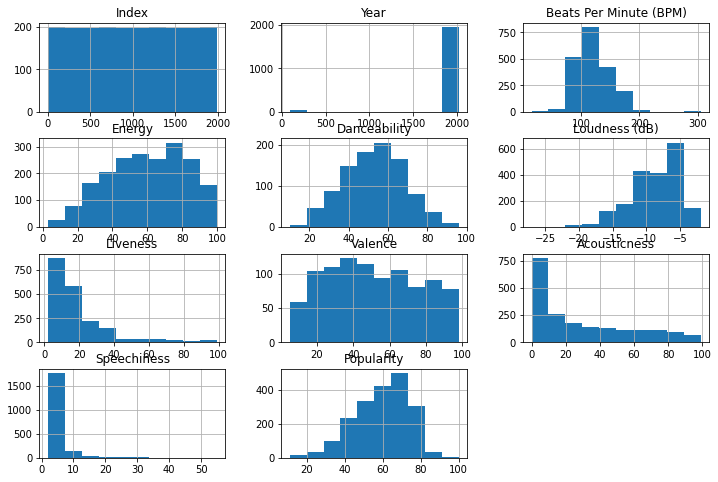

In [62]:
data_prod_df.hist(figsize=(12,8))

In [88]:
data_prod_df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1987.000000,1985.000000,1986.000000,970.000000,1987.000000,1986.000000,960.000000,1986.000000,1990.000000,1987.000000
mean,997.500000,1959.526422,120.230730,59.664149,52.983505,-9.009562,19.013092,50.820833,28.897281,4.989950,59.518873
std,575.762538,250.650856,28.625839,22.159565,15.426169,3.652092,16.739697,24.955125,29.020822,4.402899,14.362661
min,1.000000,92.000000,15.000000,3.000000,10.000000,-27.000000,2.000000,5.000000,0.000000,2.000000,11.000000
25%,499.250000,1978.000000,99.000000,42.000000,42.000000,-11.000000,9.000000,30.000000,3.000000,3.000000,49.000000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,49.000000,18.000000,4.000000,62.000000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,71.000000,50.000000,5.000000,71.000000
max,1994.000000,2019.000000,305.000000,100.000000,96.000000,-2.000000,99.000000,98.000000,99.000000,55.000000,100.000000


In [63]:
data_prod_df.Artist.value_counts()

Queen                 37
The Beatles           36
Coldplay              27
U2                    26
The Rolling Stones    24
                      ..
Peter Schilling        1
New Order              1
Limp Bizkit            1
Jethro Tull            1
Fats Domino            1
Name: Artist, Length: 729, dtype: int64

In [64]:
data_prod_df['Top Genre'].value_counts()

album rock           411
adult standards      122
dutch pop             88
alternative rock      86
dance pop             82
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: Top Genre, Length: 149, dtype: int64

In [65]:
data_prod_df['Year'].value_counts()

2008.0    54
1991.0    52
2018.0    52
1977.0    51
2002.0    47
          ..
1962.0     3
1959.0     3
1961.0     1
1960.0     1
1956.0     1
Name: Year, Length: 63, dtype: int64

* Find Total of Nans and make sure they are the same as nulls.

In [91]:

data_prod_df.isna().sum()

Index                        0
Title                        3
Artist                       8
Top Genre                    8
Year                         7
Month                        0
Beats Per Minute (BPM)       9
Energy                       8
Danceability              1024
Loudness (dB)                7
Liveness                     8
Valence                   1034
Length (Duration)            9
Acousticness                 8
Speechiness                  4
Popularity                   7
dtype: int64

In [92]:
data_prod_df.isnull().sum()

Index                        0
Title                        3
Artist                       8
Top Genre                    8
Year                         7
Month                        0
Beats Per Minute (BPM)       9
Energy                       8
Danceability              1024
Loudness (dB)                7
Liveness                     8
Valence                   1034
Length (Duration)            9
Acousticness                 8
Speechiness                  4
Popularity                   7
dtype: int64

## Data Formating Issue 1
Why is Month a Object aka String? 

In [73]:
#count number of numeric values and non-numberic values.
data_prod_df.Month.str.isnumeric().value_counts()

True     1988
False       6
Name: Month, dtype: int64

In [76]:
#count number of null Values.
data_prod_df.Month.isna().value_counts()

False    1994
Name: Month, dtype: int64

In [80]:
# Find non-numeric Data to learn more.
data_prod_df[data_prod_df.Month.str.isnumeric()==False]

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
448,449,Titanium (feat. Sia),David Guetta,dance pop,2011.0,Jan,126.0,79.0,NaN,-4.0,13.0,30.0,245,7.0,10.0,67.0
809,810,Immigrant Song - Remaster,Led Zeppelin,album rock,1970.0,Dec,113.0,93.0,NaN,-10.0,35.0,62.0,146,1.0,6.0,77.0
1061,1062,Spread Your Wings - 2011 Mix,Queen,glam rock,1977.0,Sep,175.0,66.0,NaN,-6.0,6.0,46.0,274,28.0,3.0,50.0
1645,1646,Glory Box,Portishead,art pop,1994.0,Apr,120.0,43.0,51.0,-10.0,6.0,NaN,309,18.0,4.0,67.0
1717,1718,Per Spoor (Kedeng Kedeng),Guus Meeuwis,dutch pop,1996.0,Jun,126.0,88.0,NaN,-7.0,15.0,NaN,253,20.0,5.0,49.0
1896,1897,Little Wing,Jimi Hendrix,album rock,1967.0,May,71.0,53.0,52.0,-8.0,5.0,NaN,146,18.0,8.0,69.0


In [85]:
#use DateTime, map, and lamdba to convert short month to decimal month
from datetime import datetime

data_prod_df['Month'] = data_prod_df['Month'].\
    map(lambda x: datetime.strptime(x,'%b').strftime('%-m') if x.isnumeric()== False else x )

In [86]:
# Check to make sure change in month conversion occured.
data_prod_df[data_prod_df.Month.str.isnumeric()==False]

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity


In [87]:
# Check to make sure change in month conversion occured.
data_prod_df.Month.str.isnumeric().value_counts()

True    1994
Name: Month, dtype: int64

# Question 2
## Find the number of missing values in each column and each row.


In [96]:
#find missing rows and columns
data_prod_df.isna()

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1990,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1991,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1992,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [128]:
# columns of nulls
data_prod_df.isna().sum()

Index                        0
Title                        3
Artist                       8
Top Genre                    8
Year                         7
Month                        0
Beats Per Minute (BPM)       9
Energy                       8
Danceability              1024
Loudness (dB)                7
Liveness                     8
Valence                   1034
Length (Duration)            9
Acousticness                 8
Speechiness                  4
Popularity                   7
dtype: int64

In [149]:
#rows with nulls
nulls = pd.Series()  


for i in range(cleancols_df.shape[0]):
    nulls.at[i] = cleancols_df.loc[[i]].isna().sum().sum()

nulls.filter(x > 0)

/var/folders/tq/t8mtqv314lg2510yzpslscmw0000gn/T/ipykernel_28295/1633627470.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nulls = pd.Series()


NameError: name 'x' is not defined

## Remove rows where at least 50% of the values are missing

In [112]:
# Figure out 50 of columns missing, to know which row to drow
perc = 50
min_count =  int(((100-perc)/100) * data_prod_df.shape[1])
print(min_count)

cleanrows_df=data_prod_df.dropna(axis=0, thresh=min_count)

8


In [113]:
# Checking for dropped Rows.
cleanrows_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1987 non-null   int64  
 1   Title                   1987 non-null   object 
 2   Artist                  1984 non-null   object 
 3   Top Genre               1983 non-null   object 
 4   Year                    1984 non-null   float64
 5   Month                   1987 non-null   object 
 6   Beats Per Minute (BPM)  1983 non-null   float64
 7   Energy                  1983 non-null   float64
 8   Danceability            970 non-null    float64
 9   Loudness (dB)           1983 non-null   float64
 10  Liveness                1983 non-null   float64
 11  Valence                 960 non-null    float64
 12  Length (Duration)       1982 non-null   object 
 13  Acousticness            1984 non-null   float64
 14  Speechiness             1986 non-null   

## Then remove columns where at least 50% of the values are missing.


In [114]:
# Figure out 50 of rows missing, to know which columns to drop

perc = 50
min_count =  int(((100-perc)/100) * data_prod_df.shape[0])
print(min_count)

cleancols_df=data_prod_df.dropna(axis=1, thresh=min_count)

997


In [115]:
cleancols_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1991 non-null   object 
 2   Artist                  1986 non-null   object 
 3   Top Genre               1986 non-null   object 
 4   Year                    1987 non-null   float64
 5   Month                   1994 non-null   object 
 6   Beats Per Minute (BPM)  1985 non-null   float64
 7   Energy                  1986 non-null   float64
 8   Loudness (dB)           1987 non-null   float64
 9   Liveness                1986 non-null   float64
 10  Length (Duration)       1985 non-null   object 
 11  Acousticness            1986 non-null   float64
 12  Speechiness             1990 non-null   float64
 13  Popularity              1987 non-null   float64
dtypes: float64(8), int64(1), object(5)
memor

### Question 3
## Calculate descriptive statistics for each column

In [120]:
cleancols_df.describe()


,Index,Year,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Acousticness,Speechiness,Popularity
count,1994.000000,1987.000000,1985.000000,1986.000000,1987.000000,1986.000000,1986.000000,1990.000000,1987.000000
mean,997.500000,1959.526422,120.230730,59.664149,-9.009562,19.013092,28.897281,4.989950,59.518873
std,575.762538,250.650856,28.625839,22.159565,3.652092,16.739697,29.020822,4.402899,14.362661
min,1.000000,92.000000,15.000000,3.000000,-27.000000,2.000000,0.000000,2.000000,11.000000
25%,499.250000,1978.000000,99.000000,42.000000,-11.000000,9.000000,3.000000,3.000000,49.000000
50%,997.500000,1993.000000,119.000000,61.000000,-8.000000,12.000000,18.000000,4.000000,62.000000
75%,1495.750000,2007.000000,136.000000,78.000000,-6.000000,23.000000,50.000000,5.000000,71.000000
max,1994.000000,2019.000000,305.000000,100.000000,-2.000000,99.000000,99.000000,55.000000,100.000000


## Which columns have outliers?



In [169]:
column_list = cleancols_df.columns
outlier = {}

for column in column_list:
    if(cleancols_df[column].dtype == "float64" or cleancols_df[column].dtype == "int64"):
        print(cleancols_df[column].dtype)
        mean = cleancols_df[column].mean()
        std = cleancols_df[column].std()
        
        new_df = cleancols_df[column].loc[(cleancols_df[column].mean - 3 * std) | \
            (x > cleancols_df[column].mean + 3 * std)] 
        
        print(new_df)
    



int64


TypeError: unsupported operand type(s) for -: 'method' and 'float'